In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,f1_score, accuracy_score 

In [6]:
df = pd.read_csv('TelcoDataset.csv')
df = pd.DataFrame(df)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [12]:
#coverting categorical columns into numberical values 
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                                 'PaymentMethod'], drop_first=True)


In [13]:
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.5,No,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,Yes,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,No,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,Yes,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [14]:
#Feature Scaling 
scaler = StandardScaler()

# List of numerical columns 
numerical_columns = ['SeniorCitizen','tenure','MonthlyCharges']

#Scaling numerical columns 
df[numerical_columns]= scaler.fit_transform(df[numerical_columns])


In [15]:
#Splitting data into features and target variable

x= df[numerical_columns]
y= (df['Churn']== 'Yes').astype(int)

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
x_train,x_test

(array([[-4.37749204e-01, -4.65683364e-01, -4.73723375e-04],
        [-4.37749204e-01,  8.85536787e-01,  1.07475386e+00],
        [-4.37749204e-01, -1.28460467e+00, -1.37649913e+00],
        ...,
        [-4.37749204e-01, -8.34197950e-01, -1.45294499e+00],
        [ 2.28441306e+00, -8.34197950e-01,  1.14953785e+00],
        [-4.37749204e-01, -2.60953038e-01, -1.49781538e+00]]),
 array([[-0.4377492 , -1.28460467, -1.33162874],
        [-0.4377492 ,  0.35323794, -1.31667194],
        [-0.4377492 ,  0.80364466, -1.51277218],
        ...,
        [-0.4377492 , -0.62946762, -1.49449165],
        [-0.4377492 ,  1.49972776, -0.69513389],
        [-0.4377492 , -1.28460467, -1.11392424]]))

In [32]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100 , random_state=42),
    'Support Vector Machine': SVC(),
    'Naive bayes' : GaussianNB(),
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}


param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['auto', 'sqrt']
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Naive Bayes': {}, 
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'criterion': ['gini', 'entropy']
    }
}

In [34]:
from sklearn.model_selection import GridSearchCV

results = []


for name , model in models.items():
    print(f'Tuning hyperparameter for {name}')
    param_grid= param_grids.get(name, {})
    if param_grid:
        grid_search= GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1 )
        grid_search.fit(x_train, y_train)
        best_model= grid_search.best_estimator_
        print(f'Best parameters for {name}:{grid_search.best_params_}')

    else:
           model.fit(x_train, y_train)
           best_model = model

    y_pred = best_model.predict(x_test)
    confusion_mat = confusion_matrix(y_test ,y_pred)
    class_report= classification_report(y_test, y_pred)
    acc = accuracy_score(y_test , y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc , 'f1 score': f1, 'confusion matrix': confusion_mat, 'Class Report': class_report})

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Accuracy', ascending=False))

Tuning hyperparameter for Logistic Regression
Best parameters for Logistic Regression:{'C': 1, 'solver': 'liblinear'}
Tuning hyperparameter for Random Forest


c:\Users\tanve\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanve\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanve\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\tanve\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\tanve\anaconda3\Lib\site-packag

Best parameters for Random Forest:{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuning hyperparameter for Support Vector Machine
Best parameters for Support Vector Machine:{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Tuning hyperparameter for Naive bayes
Tuning hyperparameter for K-Nearest Neighbors
Best parameters for K-Nearest Neighbors:{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Tuning hyperparameter for Decision Tree
Best parameters for Decision Tree:{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
                    Model  Accuracy  f1 score          confusion matrix  \
0     Logistic Regression  0.807665  0.571880   [[957, 79], [192, 181]]   
2  Support Vector Machine  0.803407  0.562401   [[954, 82], [195, 178]]   
4     K-Nearest Neighbors  0.782115  0.545185  [[918, 118], [189, 184]]   
1           Random Forest  0.776437  0.531947  [[915, 121], [19

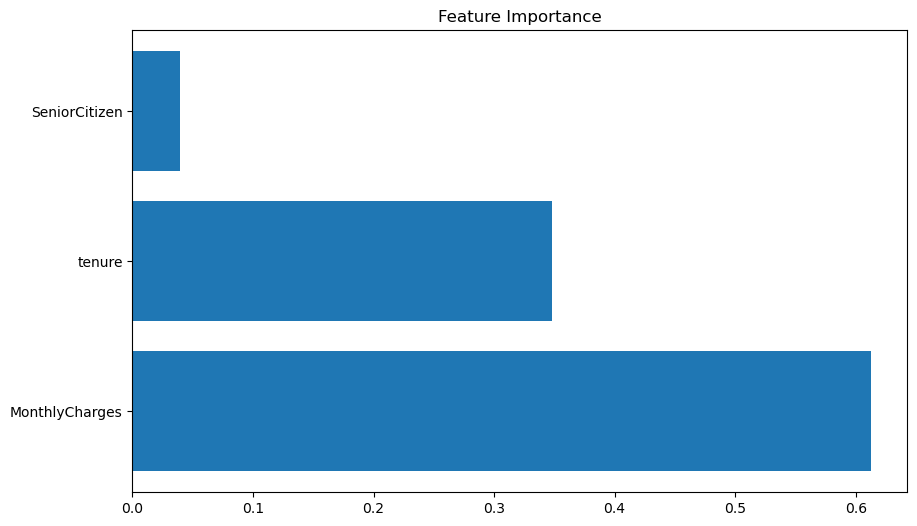

In [30]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [numerical_columns[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(x.shape[1]), importances[indices])
plt.yticks(range(x.shape[1]) , names)
plt.show()